In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import resample
from scipy.interpolate import interp1d
from ezc3d import c3d

sns.set(font_scale=1.5)
# sns.color_palette("hls", 64)
sns.set_style("whitegrid", {'font.family':'serif', 'font.serif':'Times New Roman'})

n_points = 100

In [3]:
from scipy.signal import butter, lfilter

class GrfFilter(object): 
    @staticmethod
    def butter_lowpass(cutoff, fs, order):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def apply(data, cutoff=15, fs=1500, order=2):
        b, a = GrfFilter.butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        y = y - np.median(y)
        return y

In [4]:
filename = "../../Dataset/gait-dbase-2/Participant7/Raw_Data/V35/T3.c3d"

In [5]:
content = c3d(filename, extract_forceplat_data=True)

In [24]:
trajectory_z = content['data']['points'][2, 10:15, 250:450]
force_z = content['data']['platform'][1]['force'][2, 1000:4000]
moment_z = content['data']['platform'][1]['moment'][2, 1000:4000]

In [7]:
MARKERS = ["TAM", "FAL", "FCC", "FM1", "FM5"]

In [8]:
t = (np.arange(0, trajectory_z.shape[1])) / 100.0

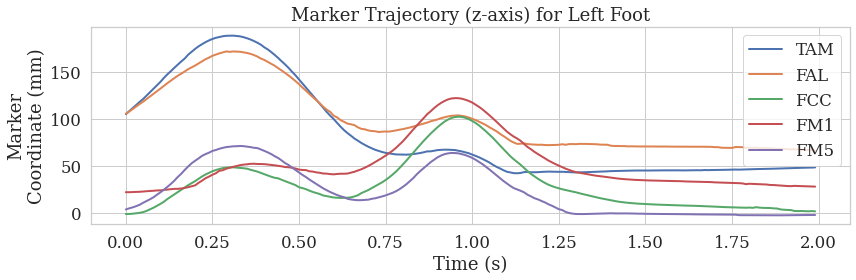

In [9]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.plot(t, trajectory_z[i, :], "-", linewidth=2, label=MARKERS[i])

plt.legend()
# plt.axis("off")
plt.title("Marker Trajectory (z-axis) for Left Foot")
plt.xlabel("Time (s)")
plt.ylabel("Marker\nCoordinate (mm)")
plt.tight_layout()
plt.savefig("../../Figures/trajectories_z_wide.svg")
plt.show()


In [10]:
trajectory_z.shape

(5, 200)

In [25]:
force_z = (force_z - np.min(force_z)) / (np.max(force_z) - np.min(force_z))

In [26]:
moment_z = (moment_z - np.min(moment_z)) / (np.max(moment_z) - np.min(moment_z))

In [27]:
force_z = GrfFilter.apply(force_z)
moment_z = GrfFilter.apply(moment_z)

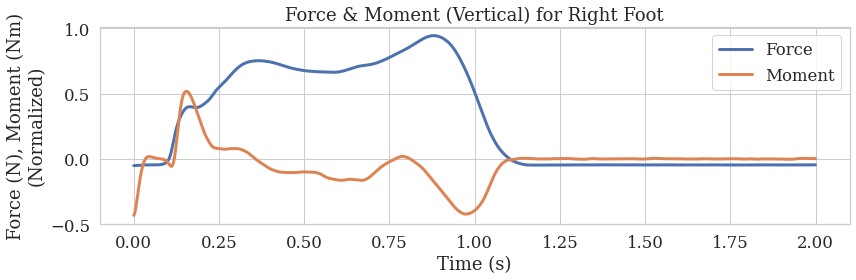

In [30]:
t = (np.arange(0, force_z.shape[0]) / 1500.0)
plt.figure(figsize=(12, 4))
plt.plot(t, force_z, linewidth=3, label="Force")
plt.plot(t, moment_z, linewidth=3, label="Moment")
plt.legend()
# plt.axis("off")
plt.title("Force & Moment (Vertical) for Right Foot")
plt.xlabel("Time (s)")
plt.ylabel("Force (N), Moment (Nm)\n(Normalized)")
plt.tight_layout()
plt.savefig("../../Figures/force_moment_z_wide.svg")
plt.show()

In [31]:
force_z = content['data']['platform'][2]['force'][2, 1000:4000]
moment_z = content['data']['platform'][2]['moment'][2, 1000:4000]
force_z = (force_z - np.min(force_z)) / (np.max(force_z) - np.min(force_z))
moment_z = (moment_z - np.min(moment_z)) / (np.max(moment_z) - np.min(moment_z))

In [32]:
force_z = GrfFilter.apply(force_z)
moment_z = GrfFilter.apply(moment_z)

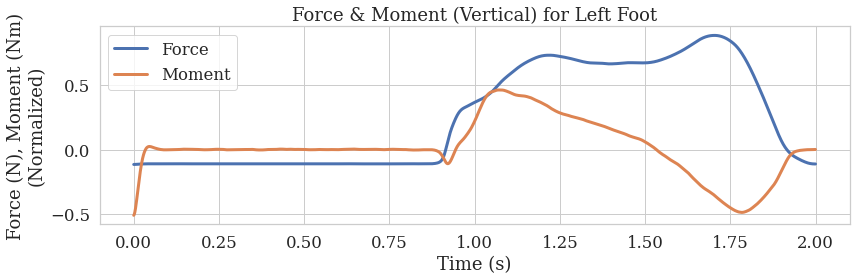

In [34]:
t = (np.arange(0, force_z.shape[0]) / 1500.0)
plt.figure(figsize=(12, 4))
plt.plot(t, force_z, linewidth=3, label="Force")
plt.plot(t, moment_z, linewidth=3, label="Moment")
plt.legend()
# plt.axis("off")
plt.title("Force & Moment (Vertical) for Left Foot")
plt.xlabel("Time (s)")
plt.ylabel("Force (N), Moment (Nm)\n(Normalized)")
plt.tight_layout()
plt.savefig("../../Figures/force_moment_z_wide_alt.svg")
plt.show()